In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import statistics  
from sklearn.metrics import classification_report as cr
from sklearn.metrics import classification_report,roc_curve
from sklearn import metrics 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC as svc
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda 
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd
from sklearn.linear_model import LassoCV
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
#Libraries for model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

#Libraries for models
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor,Ridge
from sklearn.tree import plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error as mlse
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

<br>
<font size="5">
Project Goals

This project predicts obesity using Multinomial Logistic Regression, LDA, Gaussian Naive Bayes, and Linear SVC as classifiers. The dataset, sourced from Kaggle, contains multiple features related to dietary habits, physical activity, and other factors influencing obesity. Based on these features, each observation of the test data will be classified by the four models as one of the seven weight categories. Evaluation of each model is then made using accuracy as the metrics and as it turned out, of the four, Linear SVC has better performance.

<br>
<font size="5">
Data Import

In [391]:
df_train = pd.read_csv('C:/Users/Sinh Nguyen/Documents/PHUC/DATA-SCIENCE/8555/ASS-5/CSV/train.csv')
X_test = pd.read_csv('C:/Users/Sinh Nguyen/Documents/PHUC/DATA-SCIENCE/8555/ASS-5/CSV/test.csv')

## Explore Data

In [393]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<br>
Dimension of train data

In [395]:
df_train.shape

(20758, 18)

In [396]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


<br>
Obesity Class Distribution

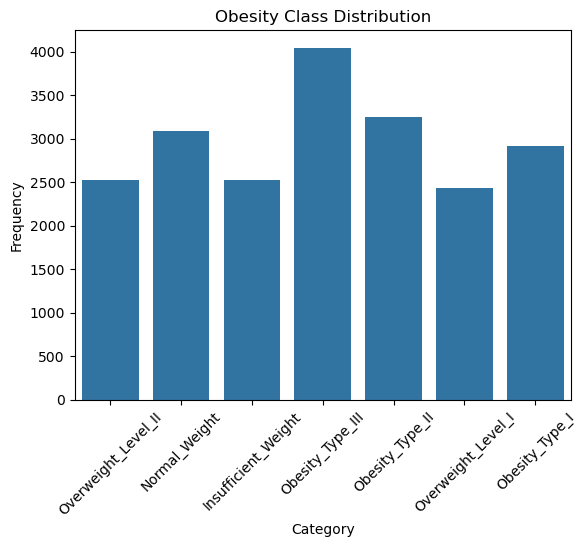

In [398]:
sns.countplot(x="NObeyesdad", data = df_train)
 
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Obesity Class Distribution")
plt.xticks(rotation = 45)
plt.show()

<br>
Histograms for numeric features

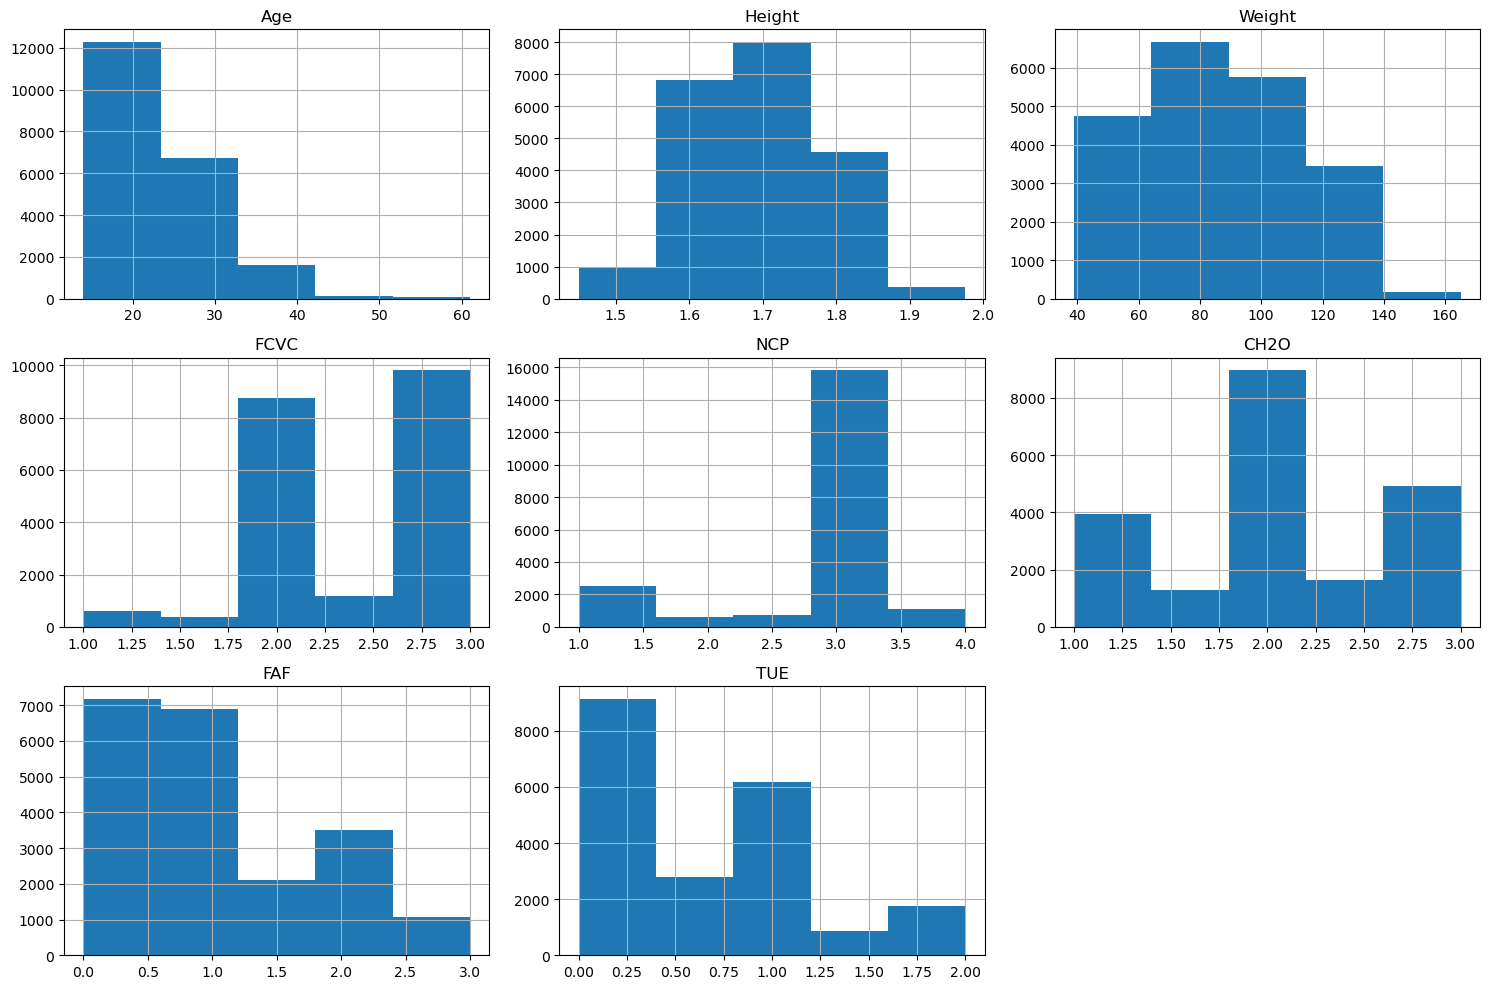

In [400]:
# Assuming df is your DataFrame
def plot_histograms(df_train):
    numeric_columns = df_train.select_dtypes(include=['number']).columns
    df_train[numeric_columns].hist(bins=5, figsize=(15, 10), layout=(len(numeric_columns) // 3 + 1, 3))
    plt.tight_layout()
    plt.show()
df_train = df_train.drop(['id'],axis = 1)    
plot_histograms(df_train)    

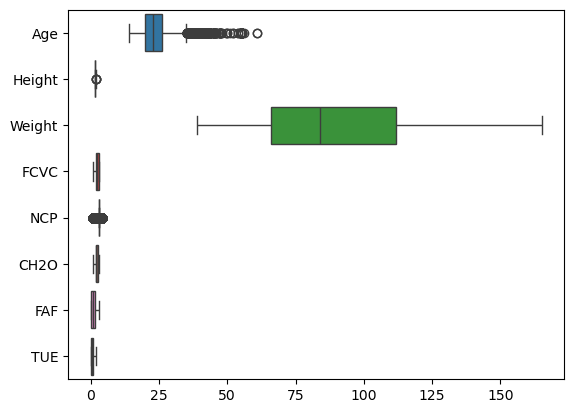

In [401]:
sns.boxplot( data = df_train, orient="h")
# display
plt.show()

<br>
Boxplot for Age shows outliers

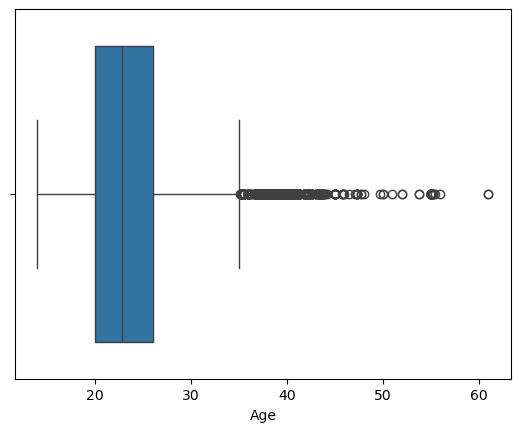

In [403]:
sns.boxplot( data = df_train.Age, orient="h")
# display
plt.show()

<br>
Boxplot for Height shows approximate normality

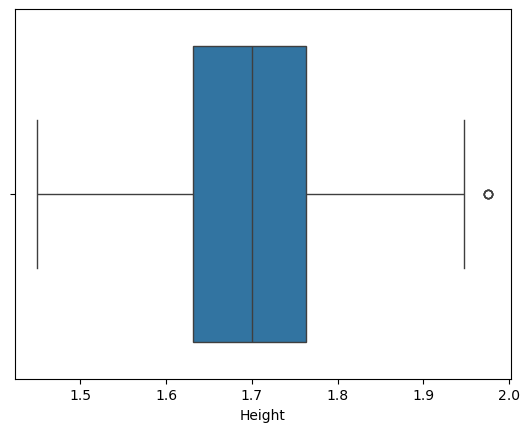

In [405]:
sns.boxplot( data = df_train.Height, orient="h")
# display
plt.show()

<br>
Boxplot for Weight shows a right-skewed distribution

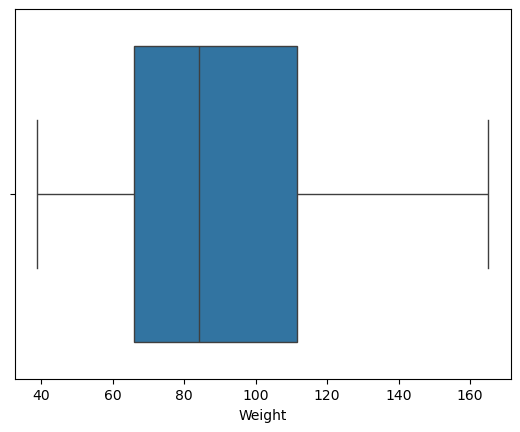

In [407]:
sns.boxplot( data = df_train.Weight, orient="h")
# display
plt.show()

<br>
Correlation Matrix for numeric features with weak correlation (<0.42) between Age, Height, and Weight

In [409]:
df_train.corr(numeric_only=True)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


<br>
Correlation Heatmap

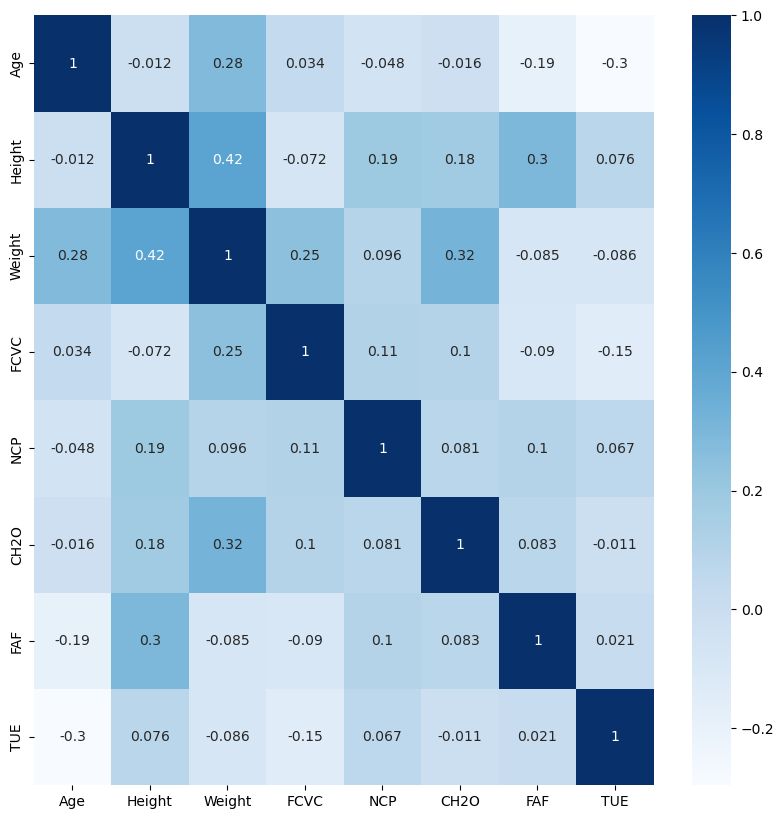

In [411]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='Blues');

<br>
<br>
Seven Weight Categories in target variable 'NObeyesdad'

In [413]:
df_train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

<br>
<br>
Column Names

In [415]:
df_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

<br>
No Missing Data

In [417]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [418]:
df_train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<br>
No Duplicated Data

In [420]:
df_train.duplicated().sum()

0

<br>
Statistics for numeric data

In [422]:
df_train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Transform Data

In [424]:
la = LabelEncoder()
la1 = LabelEncoder()

In [425]:
# Seperate train data into object and non-object
df_train_obj = df_train.select_dtypes(include='object')
df_train_non_obj = df_train.select_dtypes(exclude='object')

In [426]:
# Seperate test data into object and non-object
X_test_obj = X_test.select_dtypes(include='object')
X_test_non_obj = X_test.select_dtypes(exclude='object')

In [427]:
# Tranform object data to numeric in df_train 
for i in range(0 , df_train_obj.shape[1]):
    df_train_obj.iloc[:,i]=la.fit_transform(df_train_obj.iloc[:,i])
df_train_obj = df_train_obj.astype('int')

# Tranform object data to numeric in X_test 
for i in range(0 , X_test_obj.shape[1]):
    X_test_obj.iloc[:,i]=la1.fit_transform(X_test_obj.iloc[:,i])
X_test_obj = X_test_obj.astype('int')

<br>
Lexicographical Order of target variable 'NObeyesdad'

In [429]:
print(la.classes_)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [430]:
df_train_obj.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1,1,1,2,0,0,1,3,6
1,0,1,1,1,0,0,2,0,1
2,0,1,1,2,0,0,2,3,0
3,0,1,1,2,0,0,1,3,4
4,1,1,1,2,0,0,1,3,6


<br>
Weight Distribution for target variable 'NObeyesdad'

In [432]:
df_train_obj["NObeyesdad"].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

<br>
Weight Distribution Plot for target variable 'NObeyesdad'

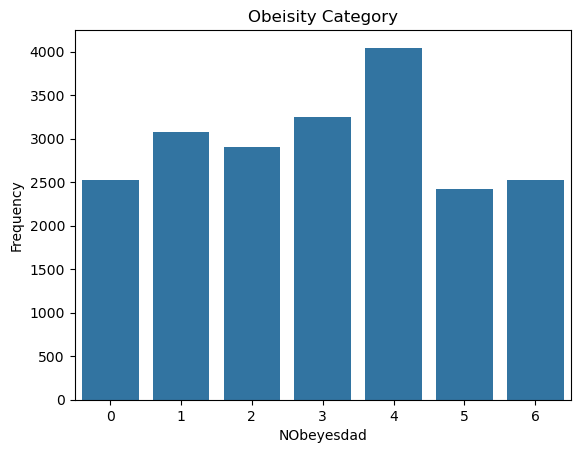

In [434]:
sns.countplot(x="NObeyesdad", data = df_train_obj)
plt.xlabel("NObeyesdad")
plt.ylabel("Frequency")
plt.title("Obeisity Category")
plt.show()

In [435]:
X_test_obj

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,1,1,1,2,0,0,2,3
1,0,1,1,2,0,0,2,3
2,0,1,1,2,0,0,2,3
3,1,1,1,2,0,0,2,3
4,0,1,1,2,0,0,2,3
...,...,...,...,...,...,...,...,...
13835,1,1,0,2,0,0,2,3
13836,0,0,1,2,0,0,2,3
13837,0,0,1,1,0,0,2,3
13838,1,1,1,2,0,0,3,3


In [436]:
df_train_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          20758 non-null  int32
 1   family_history_with_overweight  20758 non-null  int32
 2   FAVC                            20758 non-null  int32
 3   CAEC                            20758 non-null  int32
 4   SMOKE                           20758 non-null  int32
 5   SCC                             20758 non-null  int32
 6   CALC                            20758 non-null  int32
 7   MTRANS                          20758 non-null  int32
 8   NObeyesdad                      20758 non-null  int32
dtypes: int32(9)
memory usage: 729.9 KB


<br>
Combine object and non-object data

In [438]:
train_data =pd.concat([df_train_obj, df_train_non_obj], axis=1)
X_test =pd.concat([X_test_obj, X_test_non_obj], axis=1)

In [439]:
ss =StandardScaler()

<br>
<br>
Age and Weight have wide range of values and need scalings

In [441]:
train_data['Age'] = ss.fit_transform(train_data[['Age']]) 
train_data['Weight'] = ss.fit_transform(train_data[['Weight']])

X_test['Age'] = ss.fit_transform(X_test[['Age']])
X_test['Weight'] = ss.fit_transform(X_test[['Weight']])

In [442]:
train_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0.105699,1.699998,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,-1.027052,1.560000,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,-1.027052,1.711460,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,-0.507929,1.710730,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,1.371197,1.914186,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3,0.227725,1.766626,0.996987,2.919584,3.000000,2.151809,1.330519,0.196680
20754,1,0,1,1,0,0,1,3,0,-1.027052,1.710000,-1.436296,3.000000,4.000000,1.000000,2.000000,1.000000
20755,1,1,1,2,0,0,2,3,3,-0.657669,1.819557,0.670717,2.407817,3.000000,2.000000,1.158040,1.198439
20756,1,1,1,2,0,0,2,0,6,1.760067,1.700000,-0.165574,2.671238,1.971472,2.144838,0.000000,0.973834


In [443]:
train_data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0.105699,1.699998,-0.235713,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,-1.027052,1.560000,-1.170931,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,-1.027052,1.711460,-1.430012,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,-0.507929,1.710730,1.644770,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,1.371197,1.914186,0.224054,2.679664,1.971472,1.979848,1.967973,0.931721


In [444]:
X_test.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,0.508163,1.848294,1.273786,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,-0.509128,1.600000,-0.818988,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,0.353000,1.643355,0.927432,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,-0.512705,1.553127,0.623672,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,0.353000,1.627396,0.668336,3.000000,3.000000,2.653531,0.000000,0.741069


<br>
<font size="5">
Split Data

In [446]:
#x = train_data.drop(['NObeyesdad', 'id'], axis=1)
X_train = train_data.drop(['NObeyesdad'], axis=1)
y = train_data['NObeyesdad']

In [447]:
test_data = X_test.drop('id', axis=1)

In [448]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=21)

In [449]:
X_train.shape

(20758, 16)

<br>
<font size="5">
Modeling

<br>
1) Multinomial Logistic Regression 

In [452]:
model_lr = lr(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
# evaluate the model and collect the scores 
n_scores = cross_val_score(model_lr, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [453]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
mylr=model_lr.fit(x_train, y_train) 
print(mylr.score(x_train, y_train)) 
mypred=mylr.predict(x_val) 
print(cr(y_val,mypred)) 

Mean Accuracy: 0.803 (0.010)
0.8057930868360833
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       519
           1       0.71      0.72      0.71       631
           2       0.81      0.78      0.79       599
           3       0.92      0.96      0.94       607
           4       0.99      1.00      1.00       819
           5       0.67      0.58      0.62       486
           6       0.62      0.63      0.63       491

    accuracy                           0.81      4152
   macro avg       0.79      0.79      0.79      4152
weighted avg       0.81      0.81      0.81      4152



Figure 1: Confusion Matrix for Multinomial Logistic Regression Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


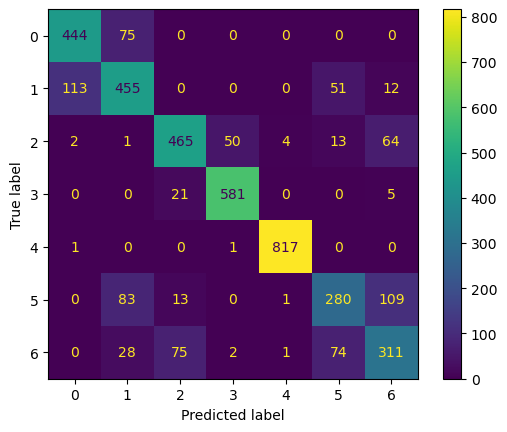

In [454]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print("Figure 1: Confusion Matrix for Multinomial Logistic Regression Model")
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

<br>
2) LDA Model

In [456]:
model_lda=LDA() 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
# evaluate the model and collect the scores 
n_scores = cross_val_score(model_lda, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [457]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
mylda=model_lda.fit(x_train, y_train) 
print(mylda.score(x_train, y_train)) 
mypred=mylda.predict(x_val) 
print(cr(y_val,mypred)) 

Mean Accuracy: 0.818 (0.009)
0.8189208719739853
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       519
           1       0.77      0.74      0.75       631
           2       0.82      0.75      0.79       599
           3       0.89      0.96      0.92       607
           4       0.99      1.00      1.00       819
           5       0.66      0.61      0.63       486
           6       0.65      0.67      0.66       491

    accuracy                           0.82      4152
   macro avg       0.80      0.80      0.80      4152
weighted avg       0.82      0.82      0.82      4152



Figure 2: Confusion Matrix for LDA Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


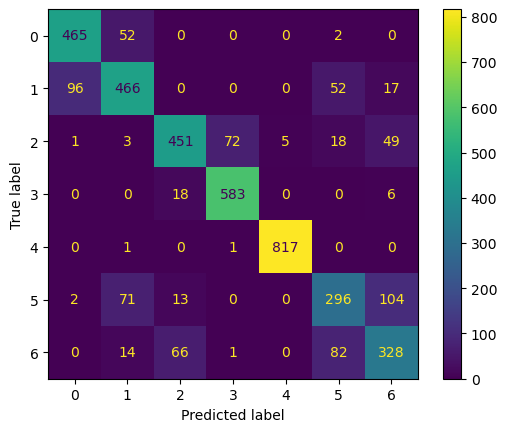

In [458]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print("Figure 2: Confusion Matrix for LDA Model")
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

<br>
3) Gaussian Naïve Bayes Model

In [460]:
model_nb=GaussianNB() 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
# evaluate the model and collect the scores 
n_scores = cross_val_score(model_nb, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [461]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
mygnb=model_nb.fit(x_train, y_train) 
print(mygnb.score(x_train, y_train)) 
mypred=mygnb.predict(x_val) 
print(cr(y_val,mypred)) 

Mean Accuracy: 0.664 (0.008)
0.6657834517644226
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       519
           1       0.64      0.47      0.54       631
           2       0.40      0.60      0.48       599
           3       0.69      0.93      0.79       607
           4       0.96      1.00      0.98       819
           5       0.61      0.27      0.38       486
           6       0.53      0.26      0.35       491

    accuracy                           0.66      4152
   macro avg       0.65      0.63      0.61      4152
weighted avg       0.67      0.66      0.64      4152



Figure 3: Confusion Matrix for Gaussian Naive Bayes Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


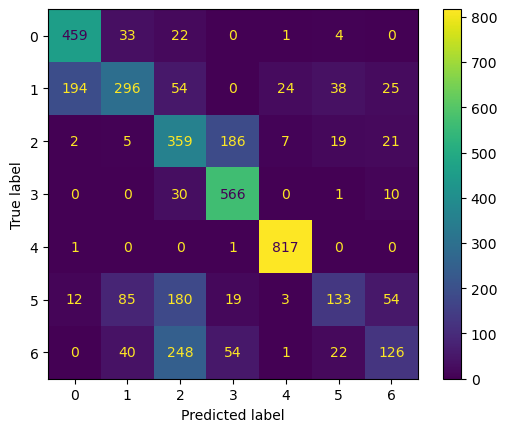

In [462]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print("Figure 3: Confusion Matrix for Gaussian Naive Bayes Model")
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

<br>
4) Support Vector Machine Model

In [464]:
model_svc = SVC(kernel='linear')
#model_svc = svc()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
#evaluate the model and collect the scores 
n_scores = cross_val_score(model_svc, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) 

In [465]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
mysvc=model_svc.fit(x_train, y_train) 
print(mysvc.score(x_train, y_train)) 
mypred=mysvc.predict(x_val)
print(cr(y_val,mypred)) 

Mean Accuracy: 0.864 (0.007)
0.8660725039142478
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       519
           1       0.84      0.80      0.82       631
           2       0.85      0.82      0.83       599
           3       0.93      0.97      0.95       607
           4       1.00      1.00      1.00       819
           5       0.74      0.68      0.71       486
           6       0.70      0.71      0.71       491

    accuracy                           0.86      4152
   macro avg       0.84      0.85      0.84      4152
weighted avg       0.86      0.86      0.86      4152



Confusion Matrix for svc

Figure 4: Confusion Matrix for SVM Model
[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]


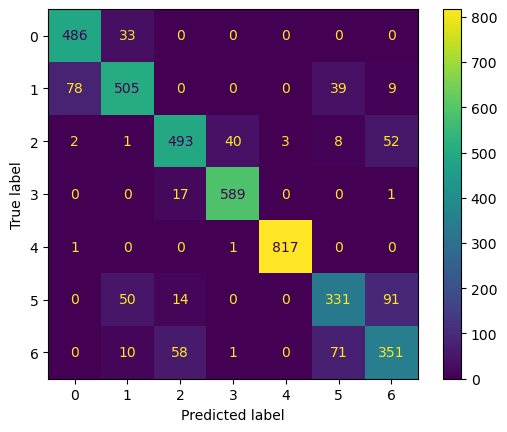

In [467]:
tmp=cm(y_val.astype('int'), mypred)
disp=cmd(tmp)
disp.plot()
print('Figure 4: Confusion Matrix for SVM Model')
print('[0, 1, 2, 3, 4, 5, 6] = [Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II]')

<br>
<font size="5">
Prediction of Test Data

In [469]:
prediction = model_svc.predict(test_data)

In [470]:
submission = pd.DataFrame({'id': X_test['id'], 'NObeyesdad': prediction})

In [471]:
submission.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [472]:
submission['NObeyesdad'].unique()

array([3, 5, 4, 2, 0, 1, 6])

In [473]:
submission['NObeyesdad'] = submission['NObeyesdad'].replace(to_replace=[0, 1, 2, 3, 4, 5, 6], value=[
    'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 
    'Obesity_Type_III', 'Overweight_Level_I','Overweight_Level_II'])
submission


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Insufficient_Weight


In [474]:
submission.to_csv('submission01.csv', index=False)

<br>
<font size="5">
CONCLUSION

<br>
Exploration of Data shows feature 'Age' having a skewed right distribution with outliers, 'Weight' also a skewed right but no outliers, 'Height' being close to normal with one insignificant outlier while the rest of numeric features do not follow a normal distribution. 
<br>
Exploration of Data also shows the correlation between 'Age', Height, and Weight is low (< 0.42) while other features are weakly correlated.
<br>
Both Age and Weight have wide range of values therefore will be scaled before modeling.

<br>
1) Assumptions and Results of Multinomial Logistic Classification


Multinomial logistic regression does not assume normality, linearity, or homoscedasticity, only the assumption of independence among the target variable choices (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III) and non-perfect separation between groups of the outcome variable. 

With the use of 10 folds and 3 repeats, the LDA classification results showed a Mean Accuracy of 0.803 and very a very small standard deviation of 0.010, a fairly good result. The f1-scores went from low 0.62 to 1.00, an almost perfect prediction accuracy for class of Obesity Type-I.

Most prediction errors (top left and bottom right of the plot of confusion matrix) occured at the boundaries of weight classes. The LDA classifier mistakenly predicted Insufficient Weight for Normal Weight, Normal Weight for Insufficient Weight, Overweight Level I for Overweight Level II. The error rate would improve if there is complete abscence of multicolliarity.

<br>
<br>
2) Assumptions and Results of Linear Discriminant Analysis (LDA)
<br>
<br>
The LDA classifer assumes that the observations in the kth class are drawn from a multivariate Gaussian distribution N(µk, Σ), where µk is a class-specifc mean vector, and Σ is a covariance matrix that is common to all K classes. Analysis of the data set showed the assumption of normality is not totally realistic and there is weak correlation between predictors in he dataset.

With the use of 10 folds and 3 repeats, the LDA classification results showed a Mean Accuracy of 0.818 and very a very small standard deviation of 0.009, a fairly good result. The f1-scores went from low 0.63 to 1.00, an almost perfect prediction accuracy for class of Obesity Type-I.

Most prediction errors (top left and bottom right of the plot of confusion matrix) occured at the boundaries of weight classes. The LDA classifier mistakenly predicted Insufficient Weight for Normal Weight, Normal Weight for Insufficient Weight, Overweight Level I for Overweight Level II. The error rate could be lower if the assumption for the multivariate Gaussian distribution is true.


<br>
<br>
3) Assumptions and Results of Gaussian Naive Bayes Classification (GNB)
<br>
<br>
The Gaussian Naive Bayes classifier assumes that within each class, all predictors are independent, it means that there is no association between the predictors in each class. However the correlation analysis has shown a correlation as high as 0.42 among variables like 'Age', Height', and 'weight'.
<br>
<br>
With the use of 10 folds and 3 repeats, the Gaussian Naive Bayes classification results showed a Mean Accuracy of 0.664 and very a very small standard deviation of 0.008, a fairly acceptable result. The f1-scores went from low 0.35 to 0.98, an almost perfect prediction accuracy for class of Obesity Type-I.
<br>
<br>

Most prediction errors (upper left,bottom left, and bottom right on the plot of confusion matrix) occured at the boundaries. Linear SVM classifier mistakenly predict: Insufficient Weight for Normal Weight, Normal Weight for 'Overweight_Level_I', Obesity_Type_I for both Overweight_Level_I and Overweight_Level_II,etc. The not so good accuracy problem might lie in the naive Bayes conditional independence assumption: When features are not independent given the class label, naive Bayes will make wrong decisions. The Naive Bayes classifier works well with only with categorical variables, so continuous features must be transformed to discrete, by a certain amount of information is thrown away. It's a strong sign against Naive Bayes having continuous variables in a dataset.

<br>
4) Assumptions and Results of Linear svm Classification

The svm classifier assumes that the data is or can be transformed into a linearly separable space. Since SVMs are sensitive to noisy data and outliers, data set needs scaling before applying the svm classifier.


With the use of 10 folds and 3 repeats, the Linear SVM classification results showed a Mean Accuracy of 0.864 and very a very small standard deviation of 0.007, a very good result. The f1-scores went from low 0.71 to 0.90, an almost perfect prediction accuracy for class of Obesity Type-I. 

Most prediction errors (upper left,bottom left, and bottom right on the plot of confusion matrix) mostly occured at the boundaries. Linear SVM classifier mistakenly predict Insufficient Weight for Normal Weight, Overweight_Level_I for Overweight_Level_II, etc. The prediction errors might be due to the inability of SVM classifiers to handle a dataset with overlapping classes, a problem in which drawing a clear hyperplane is difficult.